In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [74]:
train__set_features = pd.read_csv("training_set_features.csv")
train__set_features.shape

train__set_labels = pd.read_csv("training_set_labels.csv")

y_h1n1 = train__set_labels['h1n1_vaccine']
y_h1n1

y_seasonal = train__set_labels['seasonal_vaccine']

train__set_features.shape

(26707, 36)

In [75]:
y_seasonal.shape

(26707,)

In [76]:
train = pd.concat([train__set_features, y_h1n1, y_seasonal], axis=1)
train.shape



(26707, 38)

(array([12., 10.,  7.,  4.,  2.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00465197, 0.05441938, 0.10418678, 0.15395418, 0.20372158,
        0.25348898, 0.30325638, 0.35302378, 0.40279118, 0.45255859,
        0.50232599, 0.55209339, 0.60186079, 0.65162819, 0.70139559,
        0.75116299, 0.80093039, 0.8506978 , 0.9004652 , 0.9502326 ,
        1.        ]),
 <BarContainer object of 20 artists>)

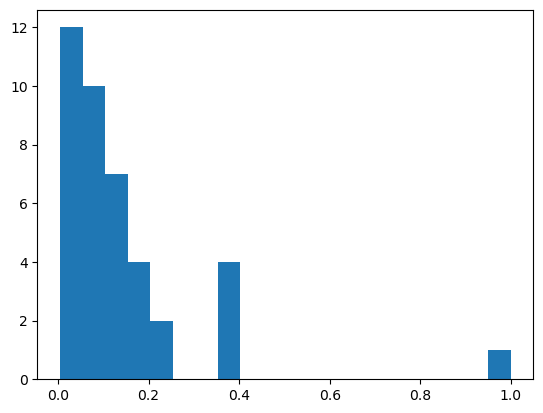

In [77]:


plt.hist(num_cors, bins=20)

On va gerer les valeurs manquantes et les valeurs categoriels 

In [78]:
train.select_dtypes(include='object').isna().sum()
# train = train.drop(['employment_industry'], axis=1)
# la moitié de employement _industry et _occupation est manquante 


age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

In [79]:
train = train.drop(["employment_industry", "employment_occupation"], axis=1)

train = pd.get_dummies(train, columns=['education', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status'])

In [84]:
from sklearn.neighbors import KNeighborsRegressor
def manage_na(X,na_col): 
    X = X.copy()
    numerical = X.select_dtypes(np.number)
    non_na_columns = numerical.loc[:,numerical.isna().sum() == 0].columns
    X_train = numerical.loc[numerical[na_col].isna() == False,non_na_columns]
    y_train = numerical.loc[numerical[na_col].isna() == False,na_col]
    X_na = numerical.loc[numerical[na_col].isna() == True, non_na_columns]
    knn = KNeighborsRegressor()
    
    knn.fit(X_train, y_train)
    print(X_na)
    y_na = knn.predict(X_na)
    X.loc[X[na_col].isna() == True, na_col] = y_na
    
    return X 

In [99]:
cond = train.corr()['seasonal_vaccine'].apply(abs).sort_values() > 0.1

nulls = train[cond.index[cond]].isna().sum() > 0

for col in nulls[nulls == True].index:
    train = manage_na(train, col)


train.isna().sum()

C:\Users\nboud\AppData\Local\Temp\ipykernel_1732\3328749396.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cond = train.corr()['seasonal_vaccine'].apply(abs).sort_values() > 0.1


respondent_id                                 0
h1n1_concern                                  0
h1n1_knowledge                                0
behavioral_antiviral_meds                    71
behavioral_avoidance                        208
behavioral_face_mask                         19
behavioral_wash_hands                         0
behavioral_large_gatherings                  87
behavioral_outside_home                      82
behavioral_touch_face                         0
doctor_recc_h1n1                              0
doctor_recc_seasonal                          0
chronic_med_condition                         0
child_under_6_months                        820
health_worker                                 0
health_insurance                              0
opinion_h1n1_vacc_effective                   0
opinion_h1n1_risk                             0
opinion_h1n1_sick_from_vacc                 395
opinion_seas_vacc_effective                   0
opinion_seas_risk                       